# Using LLM for twitter sentiment anaysis.

## finiteautomata/bertweet-base-sentiment-analysis

In [1]:
! pip install pysentimiento

     ---------------------------------------- 0.0/107.3 kB ? eta -:--:--
     -------------------------- ------------ 71.7/107.3 kB 3.8 MB/s eta 0:00:01
     -------------------------------------- 107.3/107.3 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/297.6 kB ? eta -:--:--
   ---------------------------------------- 297.6/297.6 kB 6.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/433.8 kB ? eta -:--:--
   --------------------------------------- 433.8/433.8 kB 13.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/11.7 MB ? eta -:--:--
   ----- ---------------------------------- 1.5/11.7 MB 32.0 MB/s eta 0:00:01
   --------- ------------------------------ 2.7/11.7 MB 34.1 MB/s eta 0:00:01
   ---------------- ----------------------- 4.9/11.7 MB 34.8 MB/s eta 0:00:01
   ----------------------- ---------------- 6.8/11.7 MB 39.7 MB/s eta 0:00:01
   ----------------------------- ---------- 8.6/11.7 MB 36.6 MB/s eta 0:00:01
   --

In [23]:
# Import Libraries

from pysentimiento import create_analyzer
from pysentimiento.preprocessing import preprocess_tweet

import pandas as pd
import numpy as np
import re



In [3]:
# Load Sentimment Analysis Model

TSA = create_analyzer(task="sentiment", lang="es")

c:\Users\devas\miniconda3\envs\venv\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\devas\.cache\huggingface\hub\models--pysentimiento--robertuito-sentiment-analysis. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
c:\Users\devas\miniconda3\envs\venv\Lib\site-packages\accelerate\accelerator.py:436: 

In [51]:
# Make sure TSA model is loaded

# Preprocess Tweets

def Preprocess_Text(text):
    text = text.lower()
    text = preprocess_tweet(text)
    text = re.sub(r'@[a-zA-Z0-9_]+', '', text) # Remove Mentions
    text = re.sub(r'#', '', text) # Remove Hashtags
    text = re.sub(r'RT[\s]+', '', text) # Remove Retweets
    text = re.sub(r'https?:\/\/\S+', '', text) # Remove Hyperlinks
    text = re.sub(r'\n', '', text) # Remove New Lines
    text = re.sub(r'\w*\d\w*', '', text) # Remove Digits
    text = re.sub(r'\d', '', text) # Remove Digits
    text = re.sub(r'[^\w\s]', '', text) # Remove Punctuations
    text = re.sub(r'\s+', ' ', text).strip() # Remove Extra Whitespaces
    return text

# Get Sentiment Value

def get_sentiment_value(tweet):
    tweet = Preprocess_Text(tweet)
    sentiment = TSA.predict(tweet)
    sentiment_value = {}
    for key, value in sentiment.probas.items():
        if key != 'NEU': # Remove Neutral Sentiment
            # load all keys and values in a list
            sentiment_value[key] = value

    # get the key with the highest value
    sentiment_value = max(sentiment_value, key=sentiment_value.get)
    return sentiment_value

In [56]:

# Predict Sentiment

predict_sentiment = get_sentiment_value("Neutral")
print(predict_sentiment)

NEG


In [58]:
# Testing on custom dataset

data = pd.read_csv('Data/training.1600000.processed.noemoticon.csv',encoding='latin',header=None)
data.columns=['sentiment', 'id', 'date', 'query', 'user_id', 'text']
data=data.drop(['id', 'date', 'query', 'user_id'],axis=1)

# Get randomw 1 lakh samples
data = data.sample(n=100000)


In [61]:
# preprocessed text
data['Preprocessed_text'] = data['text'].apply(Preprocess_Text)

In [59]:
# replace sentiment values
data['sentiment'] = data['sentiment'].replace(4,1)

# Sentiment Analysis

data['prediction'] = data['text'].apply(get_sentiment_value)

data.head()

,sentiment,text,prediction
1341219,1,in the appplee store on their computers,NEG
953920,1,@market_maverick look forward to ur tweets gr...,POS
397791,0,"@Heartnet13 Well, I want like an actual meal b...",NEG
1085073,1,Still don't know who @JasonJMikeMgmt is... but...,POS
1430635,1,@im_erika that's a good thing that he's stoppe...,POS


In [62]:
data.head(10)

,sentiment,text,prediction,Preprocessed_text
1341219,1,in the appplee store on their computers,NEG,in the appplee store on their computers
953920,1,@market_maverick look forward to ur tweets gr...,POS,look forward to ur tweets great job there chec...
397791,0,"@Heartnet13 Well, I want like an actual meal b...",NEG,well i want like an actual meal but thanks now...
1085073,1,Still don't know who @JasonJMikeMgmt is... but...,POS,still dont know who is but he seems cool
1430635,1,@im_erika that's a good thing that he's stoppe...,POS,thats a good thing that hes stopped talking to...
1420542,1,MET MITCHEL MUSSO!!!!!!! He's so nice.,POS,met mitchel musso hes so nice
637378,0,@stephanie_94 no she doesn't love me,NEG,no she doesnt love me
1346246,1,Ive decided to try to grow my hurr out no blo...,POS,ive decided to try to grow my hurr out no blow...
48168,0,I burnt the shit out of my finger!,NEG,i burnt the shit out of my finger
1479237,1,last night was good but very tired x,NEG,last night was good but very tired x


In [63]:
# replace prediction values "POS":1 and "NEG":0

data['prediction'] = data['prediction'].map({'POS': 1, 'NEG': 0})

data.head(10)

,sentiment,text,prediction,Preprocessed_text
1341219,1,in the appplee store on their computers,0,in the appplee store on their computers
953920,1,@market_maverick look forward to ur tweets gr...,1,look forward to ur tweets great job there chec...
397791,0,"@Heartnet13 Well, I want like an actual meal b...",0,well i want like an actual meal but thanks now...
1085073,1,Still don't know who @JasonJMikeMgmt is... but...,1,still dont know who is but he seems cool
1430635,1,@im_erika that's a good thing that he's stoppe...,1,thats a good thing that hes stopped talking to...
1420542,1,MET MITCHEL MUSSO!!!!!!! He's so nice.,1,met mitchel musso hes so nice
637378,0,@stephanie_94 no she doesn't love me,0,no she doesnt love me
1346246,1,Ive decided to try to grow my hurr out no blo...,1,ive decided to try to grow my hurr out no blow...
48168,0,I burnt the shit out of my finger!,0,i burnt the shit out of my finger
1479237,1,last night was good but very tired x,0,last night was good but very tired x


In [69]:
# Save the data

data.to_csv('Data/Sentiment_Analysis_with_LLM.csv',index=False)

In [67]:
# Accuracy
accuracy = np.mean(data['sentiment'] == data['prediction'])

# Precision
TP = np.sum((data['sentiment'] == 1) & (data['prediction'] == 1))
FP = np.sum((data['sentiment'] == 0) & (data['prediction'] == 1))
precision = TP / (TP + FP)

# Recall
FN = np.sum((data['sentiment'] == 1) & (data['prediction'] == 0))
recall = TP / (TP + FN)

# F1 Score
f1 = 2 * (precision * recall) / (precision + recall)

# Print Metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.76152
Precision: 0.7909460948568602
Recall: 0.7073386561550993
F1 Score: 0.7468096400891815


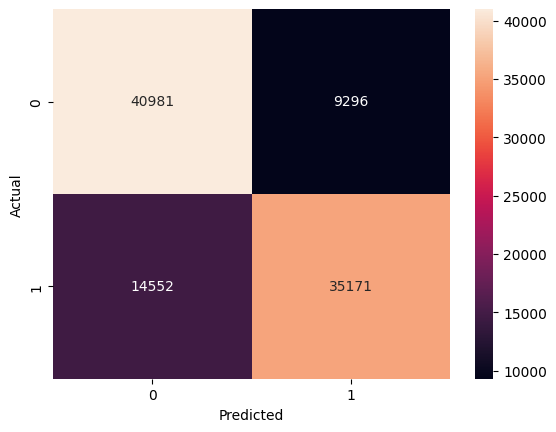

In [68]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(data['sentiment'], data['prediction'])
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()